# Medical Cost Personal Insurance Project

Project Description

Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to receive the best medical care without any strain on your finances. Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age , bmi,,no of dependents ,smoker ,region  medical insurance is calculated.

Columns                                            
•	age: age of primary beneficiary
•	sex: insurance contractor gender, female, male
•	bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.
•	children: Number of children covered by health insurance / Number of dependents
•	smoker: Smoking
•	region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
•	charges: Individual medical costs billed by health insurance


Predict : Can you accurately predict insurance costs?


In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import scipy.stats
import sklearn

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

In [57]:
!pip install imblearn
from imblearn.over_sampling import SMOTE

In [58]:
df=pd.read_csv("Medical Cost Personal Insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [59]:
df.head(15)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [60]:
df.tail(15)

,age,sex,bmi,children,smoker,region,charges
1323,42,female,40.370,2,yes,southeast,43896.37630
1324,31,male,25.935,1,no,northwest,4239.89265
1325,61,male,33.535,0,no,northeast,13143.33665
1326,42,female,32.870,0,no,northeast,7050.02130
1327,51,male,30.030,1,no,southeast,9377.90470
1328,23,female,24.225,2,no,northeast,22395.74424
1329,52,male,38.600,2,no,southwest,10325.20600
1330,57,female,25.740,2,no,southeast,12629.16560
1331,23,female,33.400,0,no,southwest,10795.93733
1332,52,female,44.700,3,no,southwest,11411.68500


In [61]:
print("Columns :",df.columns) 
print("shape:", df.shape)
print("info:", df.info())
print("data types:", df.dtypes)    # for checking the datatypes of the columns


Columns : Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')
shape: (1338, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
info: None
data types: age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [62]:
# checking the null values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64







we can see that there are no null values present in this dataset

In [63]:
df.isnull().sum().sum()

0

<Axes: >

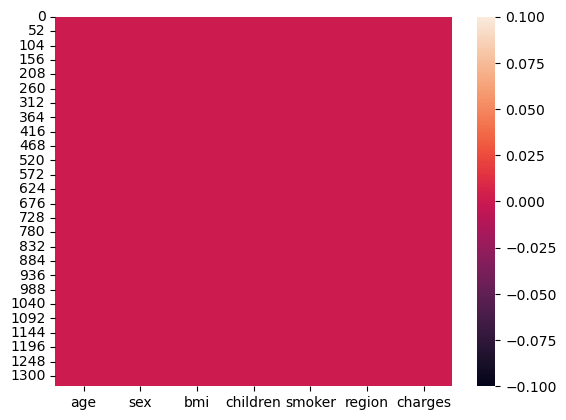

In [64]:
sns.heatmap(df.isnull()) #Lets visualize the null values using heatmap

we can clearly see that no null value is present.


In [65]:
#checking the unique values in Charges column
df["charges"].unique()

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [66]:
# checking the value counts of each column
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64


male      676
female    662
Name: sex, dtype: int64


32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64


0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


no     1064
yes     274
Name: smoker, dtype: int64


southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455 

In [67]:
#seperating the numerical and categorical columns
#Categorical columns
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical_col.append(i)
print("categorical columns:",categorical_col)
print("\n")

categorical columns: ['sex', 'smoker', 'region']




In [68]:
#Numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)
print("numerical columns:",numerical_col)
print("\n")

numerical columns: ['age', 'bmi', 'children', 'charges']




In [69]:
df.nunique().to_frame("no. of unique values")

,no. of unique values
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


In [70]:
df.duplicated().sum()

1

In [71]:
duplicated_rows = df.duplicated()
print(df[duplicated_rows])

     age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631


In [72]:
df.drop_duplicates(inplace=True)

In [73]:
df.nunique().to_frame("no. of unique values")

,no. of unique values
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [75]:
# checking the value counts of each column
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

18    69
19    67
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64


male      675
female    662
Name: sex, dtype: int64


32.30    13
28.31     9
30.80     8
31.35     8
28.88     8
         ..
46.20     1
23.80     1
44.77     1
32.12     1
30.97     1
Name: bmi, Length: 548, dtype: int64


0    573
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


no     1063
yes     274
Name: smoker, dtype: int64


southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64


16884.92400    1
2117.33885     1
2221.56445     1
19798.05455    1
13063.88300    1
      

In [76]:
# encoding the categorical columns using ordinal encoder
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))
        
df

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,3.0,16884.92400
1,18,1.0,33.770,1,0.0,2.0,1725.55230
2,28,1.0,33.000,3,0.0,2.0,4449.46200
3,33,1.0,22.705,0,0.0,1.0,21984.47061
4,32,1.0,28.880,0,0.0,1.0,3866.85520
...,...,...,...,...,...,...,...
1333,50,1.0,30.970,3,0.0,1.0,10600.54830
1334,18,0.0,31.920,0,0.0,0.0,2205.98080
1335,18,0.0,36.850,0,0.0,2.0,1629.83350
1336,21,0.0,25.800,0,0.0,3.0,2007.94500


In [77]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,0.504862,30.663452,1.095737,0.204936,1.516081,13279.121487
std,14.044333,0.500163,6.100468,1.205571,0.403806,1.105208,12110.359656
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.290000,0.000000,0.000000,1.000000,4746.344000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9386.161300
75%,51.000000,1.000000,34.700000,2.000000,0.000000,2.000000,16657.717450
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


Data Visualization

<bound method IndexOpsMixin.value_counts of 0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1337, dtype: float64>


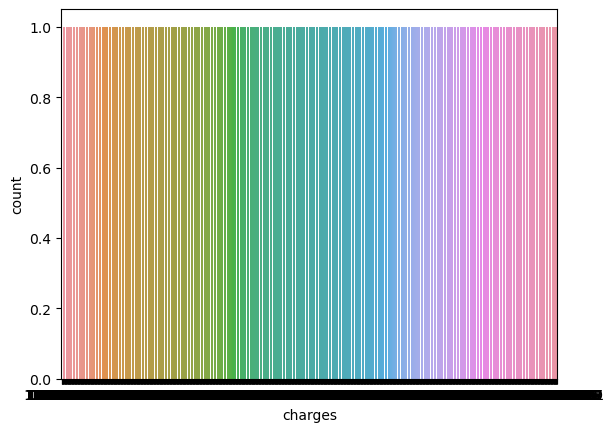

In [78]:
a= sns.countplot(x='charges',data=df)
print(df['charges'].value_counts)

There are all persons who have individual medical costs that billed by health insurance.

<bound method IndexOpsMixin.value_counts of 0       0.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
1333    1.0
1334    0.0
1335    0.0
1336    0.0
1337    0.0
Name: sex, Length: 1337, dtype: float64>


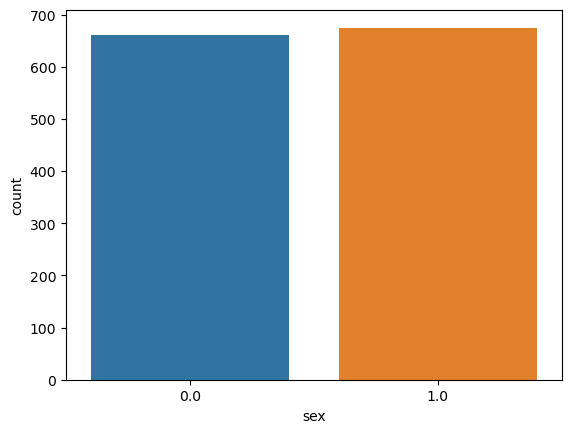

In [79]:
print(df['sex'].value_counts)
a= sns.countplot(x='sex',data=df)
plt.show()

There are more no of male persons who claimed the medical insurance.

<bound method IndexOpsMixin.value_counts of 0       1.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1333    0.0
1334    0.0
1335    0.0
1336    0.0
1337    1.0
Name: smoker, Length: 1337, dtype: float64>


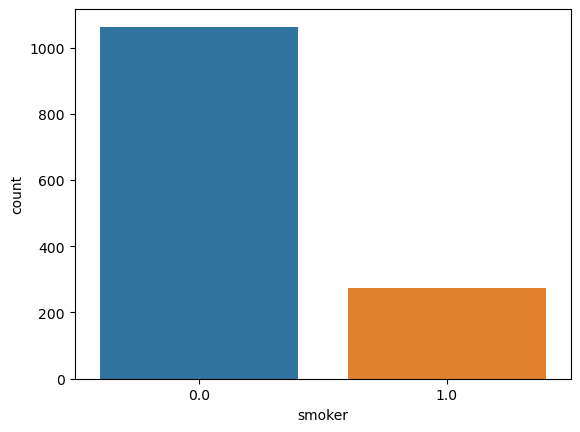

In [80]:
print(df['smoker'].value_counts)
a= sns.countplot(x='smoker',data=df)
plt.show()

There are more no of insurance claimed persons who don't do smoking 

<bound method IndexOpsMixin.value_counts of 0       3.0
1       2.0
2       2.0
3       1.0
4       1.0
       ... 
1333    1.0
1334    0.0
1335    2.0
1336    3.0
1337    1.0
Name: region, Length: 1337, dtype: float64>


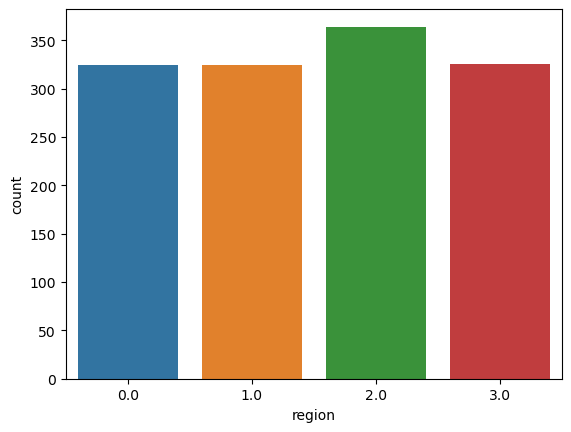

In [81]:
print(df['region'].value_counts)
a= sns.countplot(x='region',data=df)
plt.show()

There are maximum beneficiary's residential area in the US is southeast compared than others.

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

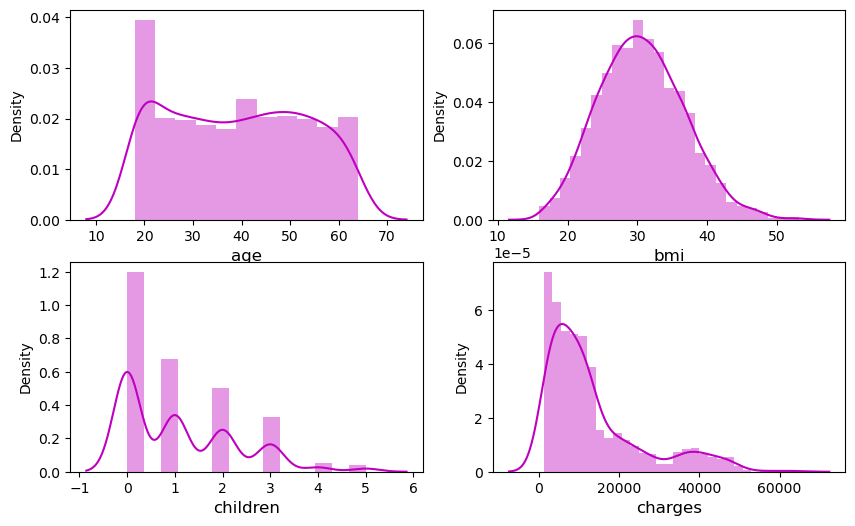

In [82]:
plt.figure(figsize=(10,6),facecolor="white")
plotnumber=1
for i in numerical_col:
    if plotnumber<=4:
        a=plt.subplot(2,2,plotnumber)
        sns.distplot(df[i], color="m")
        plt.xlabel(i,fontsize=12)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber=plotnumber+1
plt.tight_layout

1. Age of persons who claimed the medical insurance is between 18 to 65.
2. BMI is showing the normal distribution.
3. There are more number of the persons who have no number of depenpents.


In [83]:
x=df.drop('charges',axis=1)
y=df['charges']

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

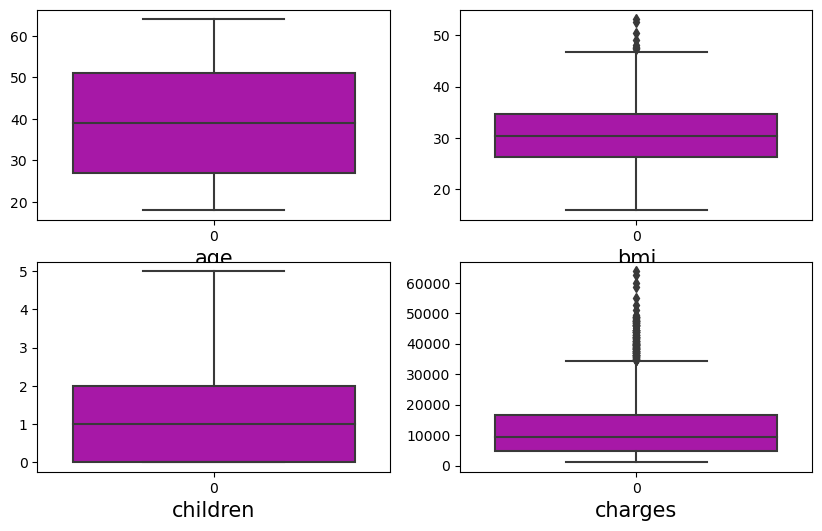

In [84]:
# checking the outliers
plt.figure(figsize=(10,6), facecolor="white")
plotnumber=1
for i in numerical_col:
    if plotnumber<=4:
        a=plt.subplot(2,2,plotnumber)
        sns.boxplot(df[i], color="m")
        plt.xlabel(i,fontsize=15)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber=plotnumber+1
plt.tight_layout

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

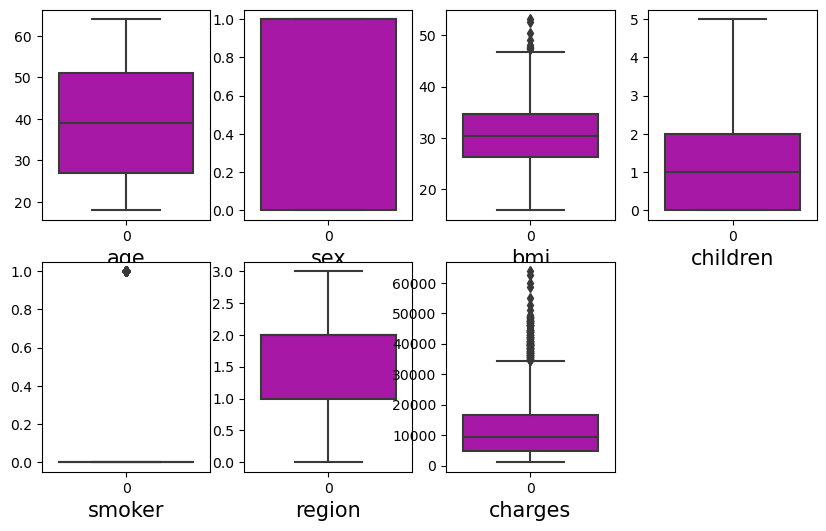

In [85]:
# checking the outliers
plt.figure(figsize=(10,6), facecolor="white")
plotnumber=1
for i in df.columns:
    if plotnumber<=8:
        a=plt.subplot(2,4,plotnumber)
        sns.boxplot(df[i], color="m")
        plt.xlabel(i,fontsize=15)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber=plotnumber+1
plt.tight_layout

outlioers are present in bmi, smoker and charges column clearly.

<Axes: xlabel='sex', ylabel='Density'>

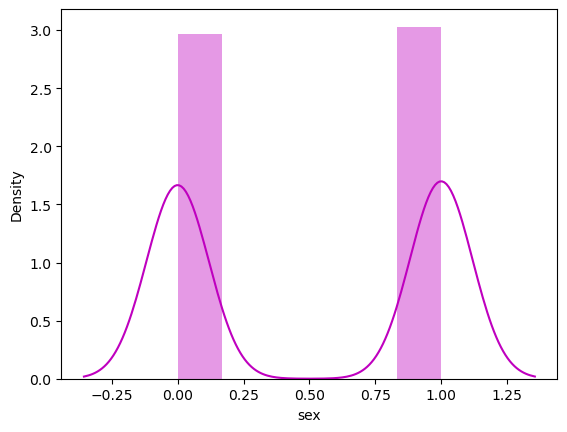

In [86]:
sns.distplot(df["sex"], color="m")

In [87]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,0.504862,30.663452,1.095737,0.204936,1.516081,13279.121487
std,14.044333,0.500163,6.100468,1.205571,0.403806,1.105208,12110.359656
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.290000,0.000000,0.000000,1.000000,4746.344000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9386.161300
75%,51.000000,1.000000,34.700000,2.000000,0.000000,2.000000,16657.717450
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


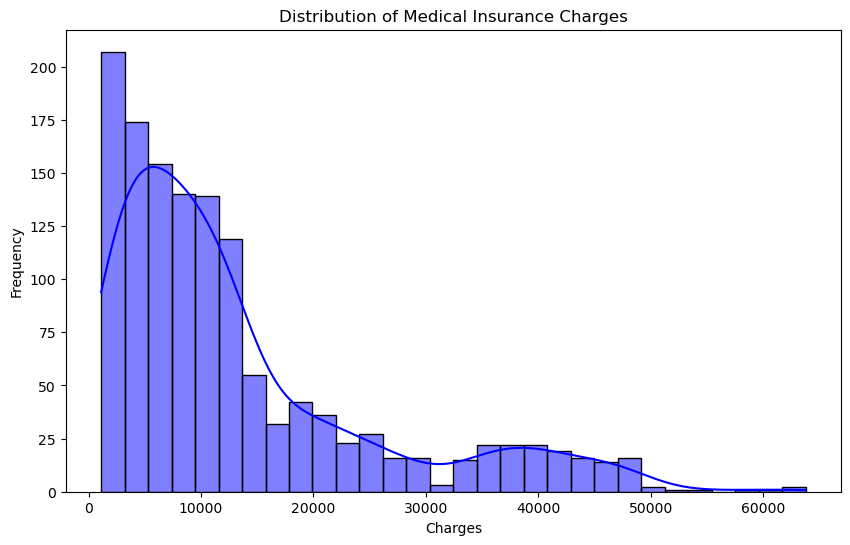

In [88]:
plt.figure(figsize=(10, 6))
sns.histplot(df['charges'], bins=30, kde=True, color='blue')
plt.title('Distribution of Medical Insurance Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

In [89]:
dfcorr=df.corr()
dfcorr

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.019814,0.109344,0.041536,-0.025587,0.001626,0.298308
sex,-0.019814,1.000000,0.046397,0.017848,0.076596,0.004936,0.058044
bmi,0.109344,0.046397,1.000000,0.012755,0.003746,0.157574,0.198401
children,0.041536,0.017848,0.012755,1.000000,0.007331,0.016258,0.067389
smoker,-0.025587,0.076596,0.003746,0.007331,1.000000,-0.002358,0.787234
region,0.001626,0.004936,0.157574,0.016258,-0.002358,1.000000,-0.006547
charges,0.298308,0.058044,0.198401,0.067389,0.787234,-0.006547,1.000000


<Axes: >

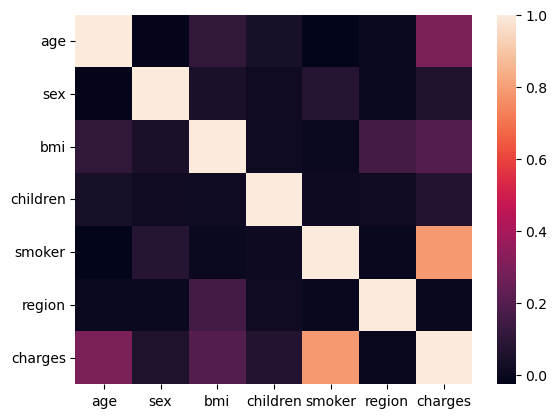

In [90]:
sns.heatmap(dfcorr)

<Axes: >

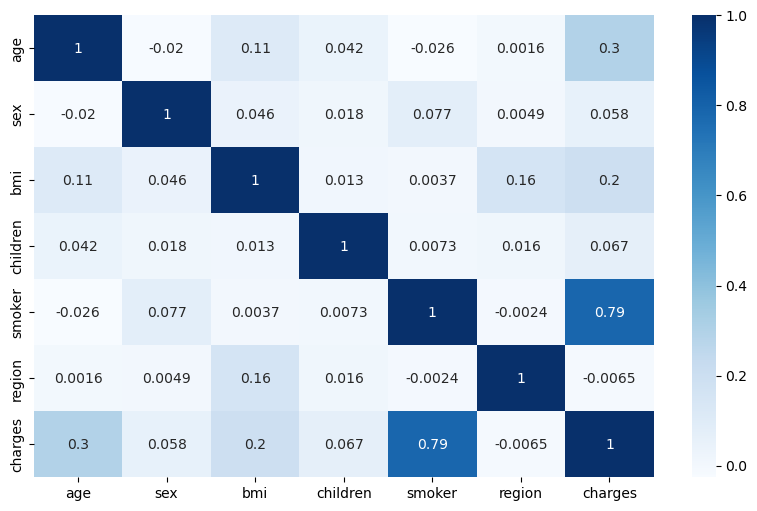

In [91]:
plt.figure(figsize=(10,6))
sns.heatmap(dfcorr, cmap="Blues", annot=True)

In [92]:
corrmatrix=df.corr()
corrmatrix['charges'].sort_values(ascending=False)

charges     1.000000
smoker      0.787234
age         0.298308
bmi         0.198401
children    0.067389
sex         0.058044
region     -0.006547
Name: charges, dtype: float64

In [93]:
from scipy.stats import zscore

# removing the outliers
z=np.abs(zscore(df))
z

,age,sex,bmi,children,smoker,region,charges
0,1.440418,1.009771,0.453160,0.909234,1.969660,1.343163,0.297857
1,1.511647,0.990324,0.509422,0.079442,0.507702,0.438017,0.954381
2,0.799350,0.990324,0.383155,1.580143,0.507702,0.438017,0.729373
3,0.443201,0.990324,1.305052,0.909234,0.507702,0.467128,0.719104
4,0.514431,0.990324,0.292456,0.909234,0.507702,0.467128,0.777499
...,...,...,...,...,...,...,...
1333,0.767704,0.990324,0.050269,1.580143,0.507702,0.467128,0.221263
1334,1.511647,1.009771,0.206053,0.909234,0.507702,1.372274,0.914695
1335,1.511647,1.009771,1.014490,0.909234,0.507702,0.438017,0.962287
1336,1.297958,1.009771,0.797524,0.909234,0.507702,1.343163,0.931054


In [94]:
threshold=3
print(np.where(z>3))
df_new=df[(z<3).all(axis=1)]
df_new

(array([  32,   34,   71,  116,  166,  413,  425,  438,  543,  568,  577,
        639,  818,  846,  876,  931,  936,  968,  983, 1046, 1084, 1115,
       1129, 1145, 1229, 1244, 1271, 1299, 1316]), array([3, 6, 3, 2, 3, 3, 3, 3, 6, 3, 6, 3, 6, 2, 3, 3, 3, 3, 3, 2, 3, 3,
       3, 6, 6, 3, 3, 6, 2]))


,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,3.0,16884.92400
1,18,1.0,33.770,1,0.0,2.0,1725.55230
2,28,1.0,33.000,3,0.0,2.0,4449.46200
3,33,1.0,22.705,0,0.0,1.0,21984.47061
4,32,1.0,28.880,0,0.0,1.0,3866.85520
...,...,...,...,...,...,...,...
1333,50,1.0,30.970,3,0.0,1.0,10600.54830
1334,18,0.0,31.920,0,0.0,0.0,2205.98080
1335,18,0.0,36.850,0,0.0,2.0,1629.83350
1336,21,0.0,25.800,0,0.0,3.0,2007.94500


age            Axes(0.125,0.53;0.110714x0.35)
sex         Axes(0.257857,0.53;0.110714x0.35)
bmi         Axes(0.390714,0.53;0.110714x0.35)
children    Axes(0.523571,0.53;0.110714x0.35)
smoker      Axes(0.656429,0.53;0.110714x0.35)
region      Axes(0.789286,0.53;0.110714x0.35)
charges        Axes(0.125,0.11;0.110714x0.35)
dtype: object

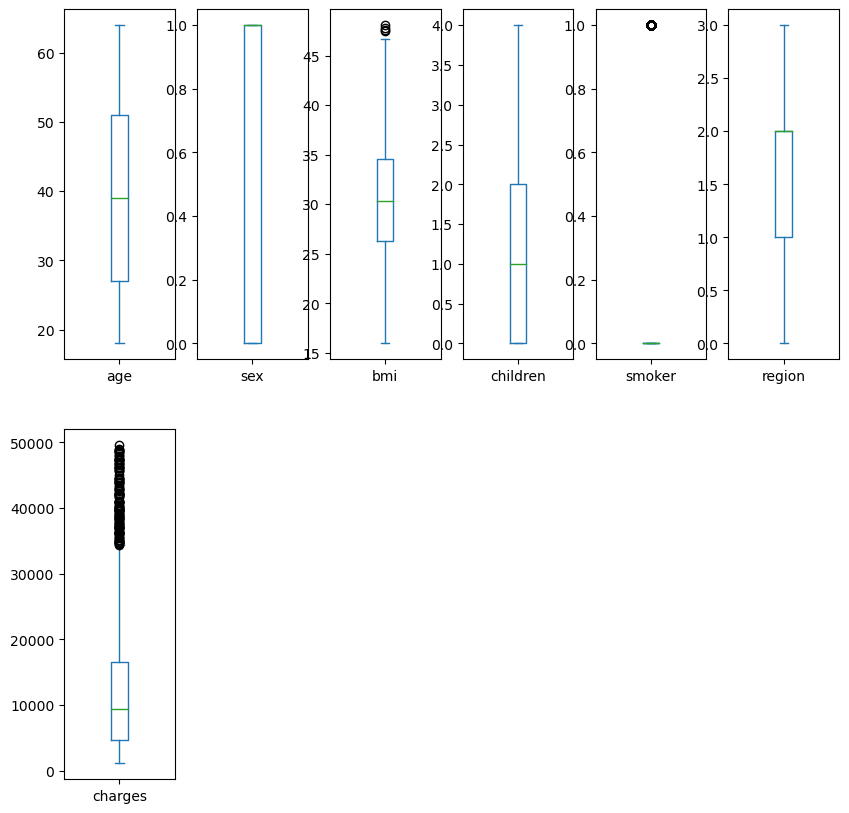

In [95]:
df_new.plot(kind='box',subplots=True, layout=(2,6), figsize=(10,10))

In [96]:
#%data loss calculation
loss_percent=(1337-1308)/1337*100
print(loss_percent)

2.169035153328347


In [97]:
#Splitting the independent and target variables in x and y
x=df_new.drop('charges',axis=1)
y=df_new['charges']

In [98]:
x

,age,sex,bmi,children,smoker,region
0,19,0.0,27.900,0,1.0,3.0
1,18,1.0,33.770,1,0.0,2.0
2,28,1.0,33.000,3,0.0,2.0
3,33,1.0,22.705,0,0.0,1.0
4,32,1.0,28.880,0,0.0,1.0
...,...,...,...,...,...,...
1333,50,1.0,30.970,3,0.0,1.0
1334,18,0.0,31.920,0,0.0,0.0
1335,18,0.0,36.850,0,0.0,2.0
1336,21,0.0,25.800,0,0.0,3.0


In [99]:
x.skew()

age         0.050421
sex        -0.009185
bmi         0.191361
children    0.737050
smoker      1.481539
region     -0.024001
dtype: float64

In [101]:
from sklearn.preprocessing import power_transform
df_new1=power_transform(x)
df_new1=pd.DataFrame(df_new,columns=x.columns)

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

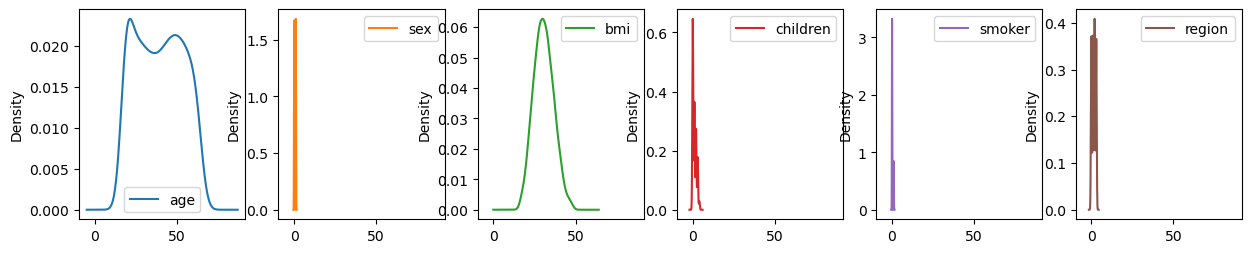

In [102]:
df_new1.plot(kind='kde',subplots=True,layout=(2,6),figsize=(15,6))

In [103]:
df_new1.skew()

age         0.050421
sex        -0.009185
bmi         0.191361
children    0.737050
smoker      1.481539
region     -0.024001
dtype: float64

In [104]:
x=df_new1
x

,age,sex,bmi,children,smoker,region
0,19,0.0,27.900,0,1.0,3.0
1,18,1.0,33.770,1,0.0,2.0
2,28,1.0,33.000,3,0.0,2.0
3,33,1.0,22.705,0,0.0,1.0
4,32,1.0,28.880,0,0.0,1.0
...,...,...,...,...,...,...
1333,50,1.0,30.970,3,0.0,1.0
1334,18,0.0,31.920,0,0.0,0.0
1335,18,0.0,36.850,0,0.0,2.0
1336,21,0.0,25.800,0,0.0,3.0


In [105]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,age,sex,bmi,children,smoker,region
0,-1.440754,-1.004598,-0.449186,-0.930279,1.983897,1.351994
1,-1.511806,0.995423,0.533188,-0.040802,-0.504058,0.446975
2,-0.801288,0.995423,0.404324,1.738153,-0.504058,0.446975
3,-0.446029,0.995423,-1.318596,-0.930279,-0.504058,-0.458045
4,-0.517081,0.995423,-0.285179,-0.930279,-0.504058,-0.458045
...,...,...,...,...,...,...
1303,0.761851,0.995423,0.064594,1.738153,-0.504058,-0.458045
1304,-1.511806,-1.004598,0.223581,-0.930279,-0.504058,-1.363065
1305,-1.511806,-1.004598,1.048641,-0.930279,-0.504058,0.446975
1306,-1.298651,-1.004598,-0.800632,-0.930279,-0.504058,1.351994


In [106]:
#Model Building
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [107]:
lr=LinearRegression()
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)


In [108]:
print("error:")
print("Mean squared error:", mean_squared_error(y_test, predlr))
print("Mean absolute error:", mean_absolute_error(y_test, predlr))
print("Root Mean squared error:", np.sqrt(mean_squared_error(y_test, predlr)))

error:
Mean squared error: 29996498.933533892
Mean absolute error: 3938.0918457958155
Root Mean squared error: 5476.905963546745


In [109]:
print(r2_score(y_test, predlr))

0.7541503591967134


In [110]:
from sklearn.svm import SVR
svr=SVR(kernel='linear')
svr.fit(x_train,y_train)

SVR(kernel='linear')

In [111]:
svr.score(x_train,y_train)

-0.013707103479221994

In [112]:
pred_y=svr.predict(x_test)

In [113]:
print('error:')
print(mean_squared_error(y_test,pred_y))

error:
124190807.2255439


In [114]:
print(r2_score(y_test,pred_y))

-0.0178609648787158


In [118]:
LRscore=cross_val_score(lr,x,y,cv=5)
print('Cross validation score of linear regression model:',LRscore.mean())
print("Difference between accuracy score and cross validation score is", r2_score(y_test, predlr)-LRscore.mean())

Cross validation score of linear regression model: 0.7505580662519831
Difference between accuracy score and cross validation score is 0.003592292944730291


In [119]:
svrscore=cross_val_score(svr,x,y,cv=5)
print('Cross validation score of support vector regressor model:',svrscore.mean())
print("Difference between accuracy score and cross validation score is", r2_score(y_test,pred_y)-svrscore.mean())

Cross validation score of support vector regressor model: -0.012120506663141484
Difference between accuracy score and cross validation score is -0.0057404582155743174


The difference is less in support vector regressor model ,so it is the best model.

In [120]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 10, 'random_state': 0}


In [121]:
ls=Lasso(alpha=1,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
lss=r2_score(y_test,pred_ls)
lss

0.7541502160307549

In [122]:
cv_score=cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.7505608012189575